In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC  

from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
df=pd.read_csv('Steel_industry_data.csv')
df['date']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M")
x=['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Lagging_Current_Power_Factor']
df.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,2018-01-01 01:30:00,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,2018-01-01 01:45:00,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,2018-01-01 02:00:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,2018-01-01 02:15:00,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,2018-01-01 02:30:00,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [4]:
df.dtypes

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

Check For Missing Values:

In [5]:
df.isnull().sum()
df.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

Numerical Descriptive Statistics:

In [6]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Categorical Descriptive Statistics:

In [7]:
categorical_features = df.select_dtypes(include=[object])

#categorical_features.columns
categorical_features.describe()

,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040
unique,2,7,3
top,Weekday,Monday,Light_Load
freq,25056,5088,18072


Usage_kWh Time Series Plot:

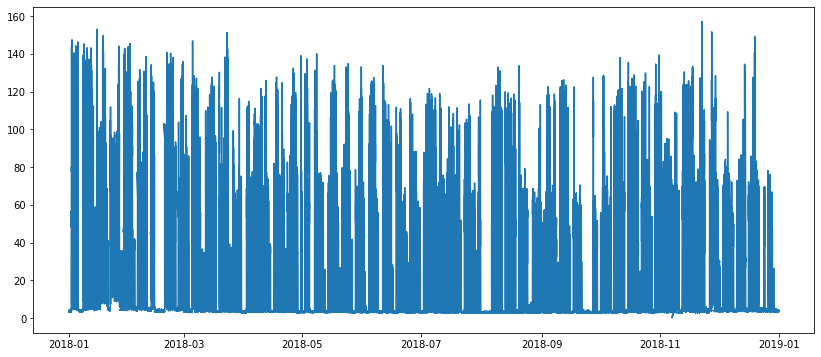

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df['date'],df['Usage_kWh'])
plt.show()

Histograms:

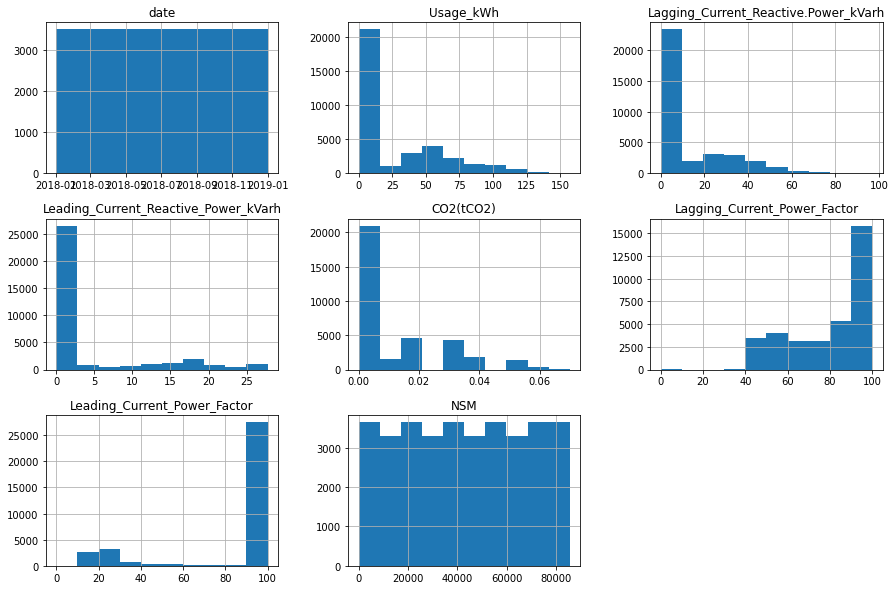

In [9]:
df.hist(figsize = (15,10))
plt.show()

Boxplots:

Usage_kWh


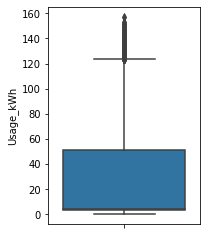

Lagging_Current_Reactive.Power_kVarh


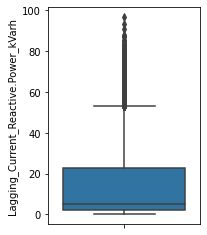

Leading_Current_Reactive_Power_kVarh


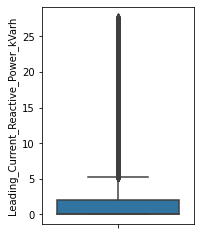

CO2(tCO2)


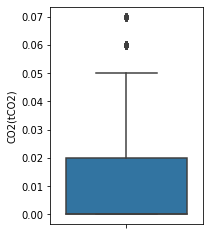

Lagging_Current_Power_Factor


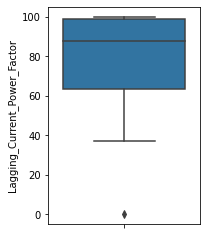

Leading_Current_Power_Factor


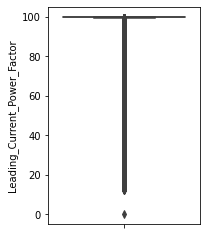

NSM


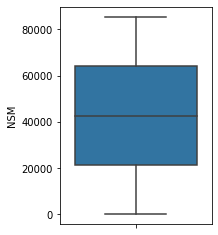

In [10]:

dataf=np.hsplit(df, [1,-3])[1]
#df=data.copy()
for i in dataf:
    print(i)
    plt.subplot(1,2,1)
    sns.boxplot(y=dataf[i])    
    """Q1 = np.percentile(dataf[i], 25,interpolation = 'midpoint') 
    Q3 = np.percentile(dataf[i], 75,interpolation = 'midpoint')
    IQR = Q3-Q1
    
    df.loc[df[i] > (Q3+1.5*IQR)]=np.nan
    df.loc[df[i] < (Q1-1.5*IQR)]=np.nan
    df=df.fillna(df.median(),axis=0)
    plt.subplot(1,2,2)
    sns.boxplot(y=df[i])"""
    plt.show()


In [11]:
#df.drop()

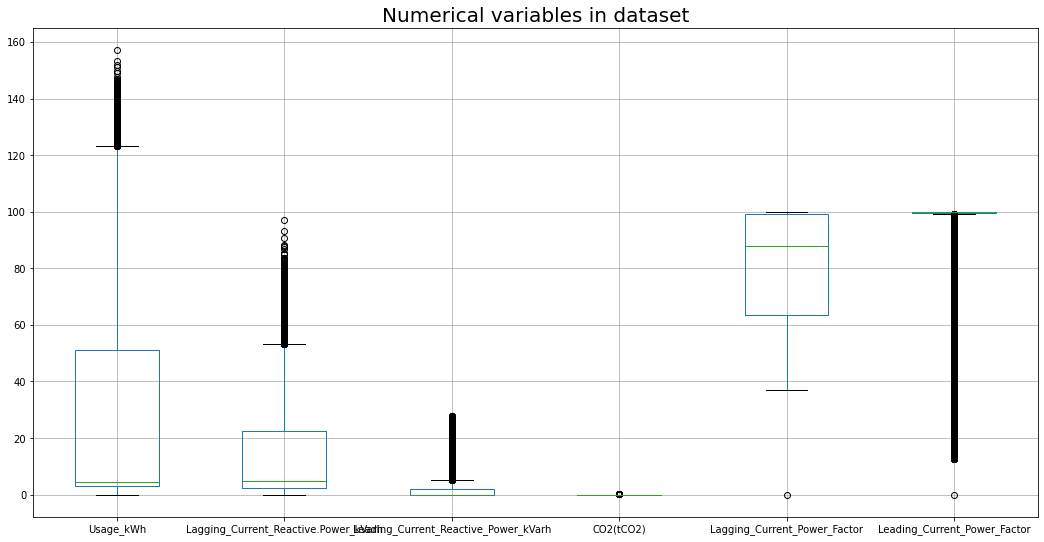

In [12]:
num_cols = np.array(df.columns[1:-4])
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

Pairplots:

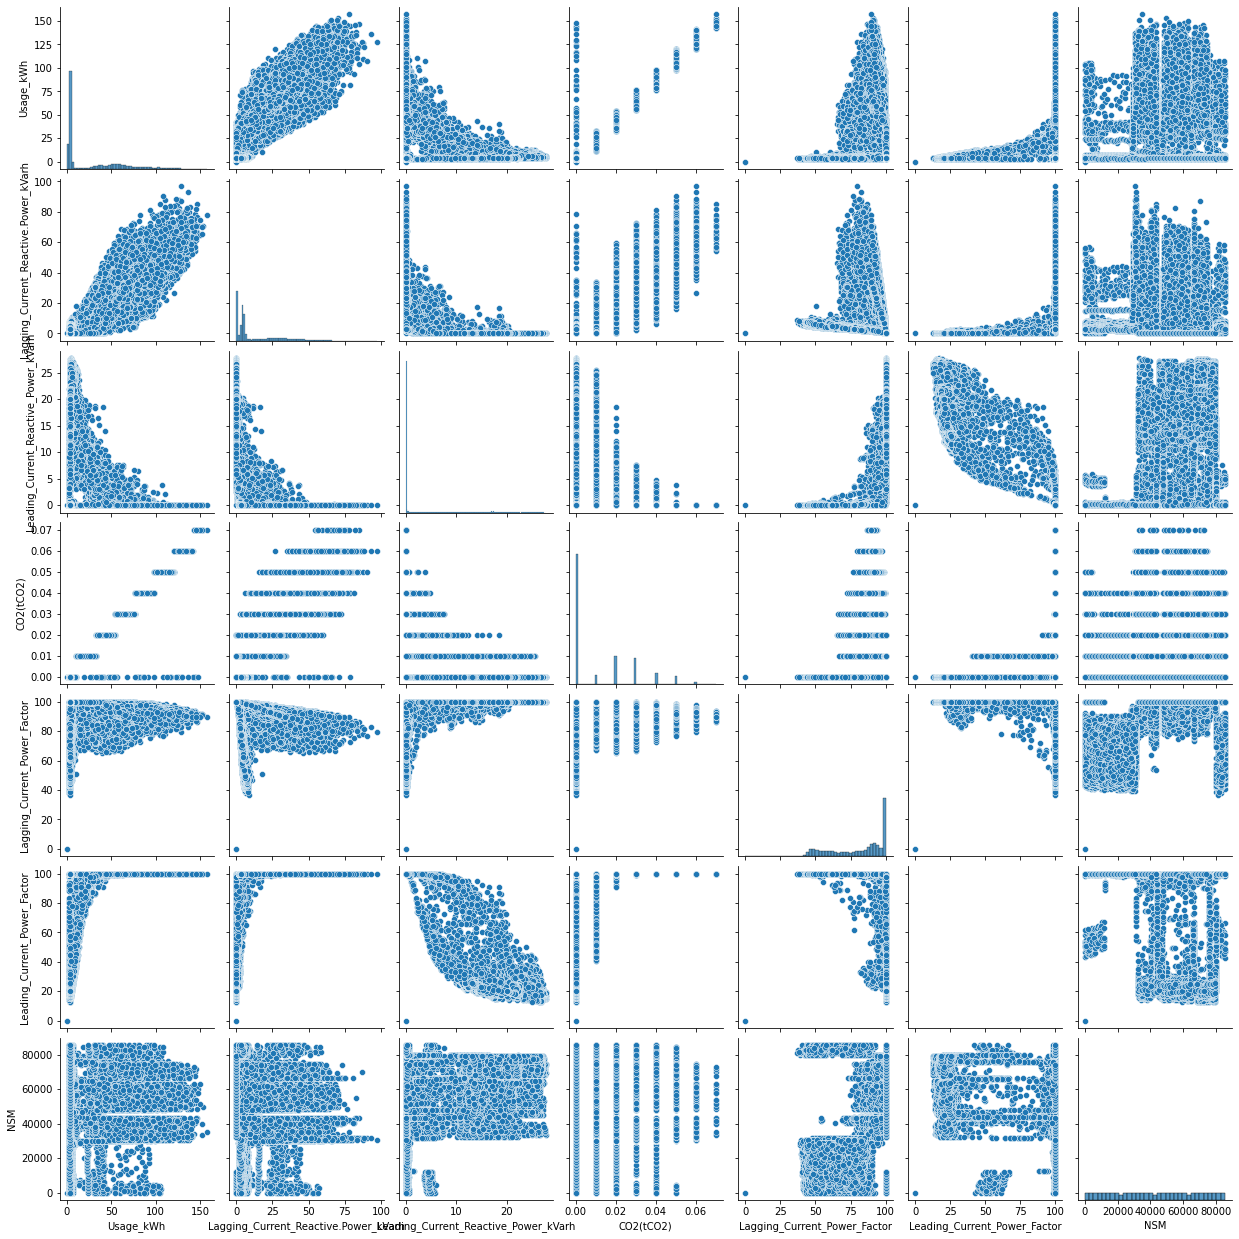

In [13]:
sns.pairplot(df)

Removing Outliers:

In [14]:
df=df.drop(['Leading_Current_Power_Factor','Leading_Current_Reactive_Power_kVarh'],axis=1)
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,73.21,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,66.77,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.0,70.28,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.0,68.09,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.0,64.72,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.0,62.10,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.0,70.71,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.0,76.62,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.0,77.72,85500,Weekday,Monday,Light_Load


Pivot Tables and Graphs:

In [15]:
df1=pd.pivot_table(df, index = ['Load_Type'], values = x, 
               aggfunc = np.mean)
df1

,CO2(tCO2),Lagging_Current_Power_Factor,Lagging_Current_Reactive.Power_kVarh,Usage_kWh
Load_Type,,,,
Light_Load,0.002554,69.679545,7.004266,8.626207
Maximum_Load,0.026899,91.013417,26.190308,59.265314
Medium_Load,0.016713,93.064849,14.410357,38.445394


Visualizing data based on Load Type:

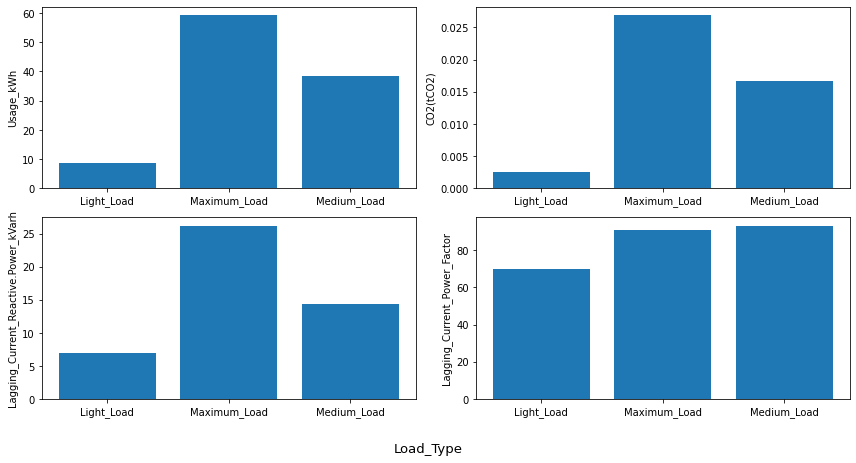

In [16]:
fig,axes=plt.subplots(2,2,figsize=(12,6))
for i in range(0,2):
  for j in range(0,2):
    axes[i,j].bar(df1.index.astype(str),df1[x[i*2+j]])
    axes[i,j].set_ylabel(x[i*2+j])
fig.text(0.5, -0.05, 'Load_Type', ha='center', va='center',size=13.25)
plt.tight_layout()
plt.show()


In [17]:
df1=pd.pivot_table(df, index = ['WeekStatus'], values = x, 
               aggfunc = np.mean)
df1

,CO2(tCO2),Lagging_Current_Power_Factor,Lagging_Current_Reactive.Power_kVarh,Usage_kWh
WeekStatus,,,,
Weekday,0.014486,79.932112,16.327770,33.624727
Weekend,0.004093,82.199129,4.772759,11.732327


Visualizing data based on Week Status:

C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3330145850.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3330145850.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3330145850.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3330145850.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)


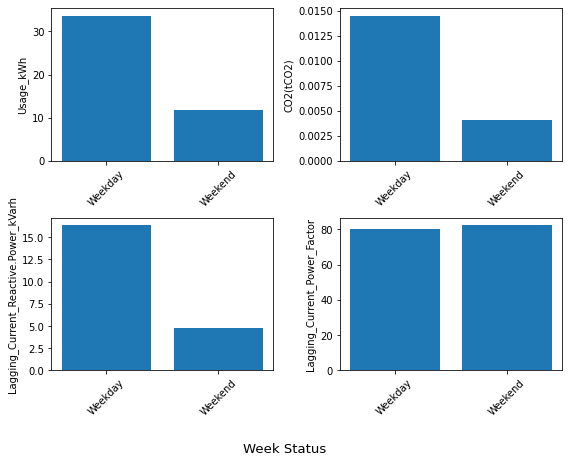

In [18]:
fig,axes=plt.subplots(2,2,figsize=(8,6))
#x = ['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for i in range(0,2):
  for j in range(0,2):
    axes[i,j].bar(df1.index.astype(str),df1[x[i*2+j]])
    axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
    axes[i,j].set_ylabel(x[i*2+j])
fig.text(0.5, -0.05, 'Week Status', ha='center', va='center',size=13.25)
plt.tight_layout()
plt.show()

In [19]:
df1=pd.pivot_table(df, index = ['Day_of_week'], values = x, 
               aggfunc = np.mean)
df1

,CO2(tCO2),Lagging_Current_Power_Factor,Lagging_Current_Reactive.Power_kVarh,Usage_kWh
Day_of_week,,,,
Friday,0.014339,79.848419,16.103950,33.195014
Monday,0.014324,79.618194,16.106470,33.143935
Saturday,0.006140,82.226583,6.309886,15.919020
Sunday,0.002045,82.171675,3.235633,7.545633
Thursday,0.015294,79.561917,17.356707,35.112083
Tuesday,0.014587,80.080509,16.610397,34.427614
Wednesday,0.013886,80.557556,15.465583,32.254235


Visualizing data based on Day of Week:

C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3605780165.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3605780165.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3605780165.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/3605780165.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)


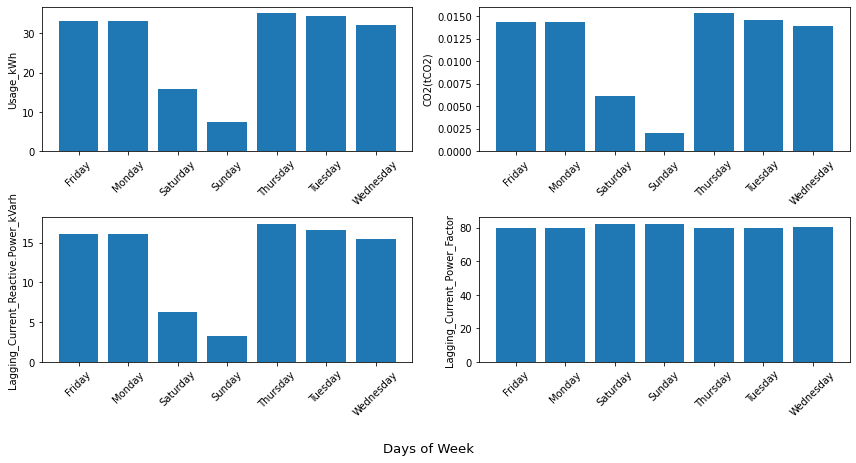

In [20]:
fig,axes=plt.subplots(2,2,figsize=(12,6))
#x = ['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for i in range(0,2):
  for j in range(0,2):
    axes[i,j].bar(df1.index.astype(str),df1[x[i*2+j]])
    axes[i,j].set_xticklabels(df1.index.astype(str), rotation = 45)
    axes[i,j].set_ylabel(x[i*2+j])
fig.text(0.5, -0.05, 'Days of Week', ha='center', va='center',size=13.25)
plt.tight_layout()
plt.show()

In [21]:
df1=pd.pivot_table(df, index = x, 
               aggfunc = np.mean)
df1

NSM
Usage_kWh CO2(tCO2) Lagging_Current_Reactive.Power_kVarh Lagging_Current_Power_Factor         
0.00      0.00      0.00                                 0.00                              0.0
2.45      0.00      4.00                                 52.23                          2700.0
                    4.36                                 48.99                         24300.0
                    4.61                                 46.93                         85050.0
                    4.64                                 46.69                         83700.0
...                                                                                        ...
149.65    0.07      64.87                                91.75                         63000.0
151.31    0.07      65.20                                91.84                         33300.0
151.67    0.07      69.73                                90.86                         39600.0
153.14    0.07      70.45                                90.85                         49500.0
157.18    0.07      77.72                                89.64                         35100.0

[20478 rows x 1 columns]

Visualizing data based on Day of Week and Load Type: 

<Figure size 864x288 with 0 Axes>

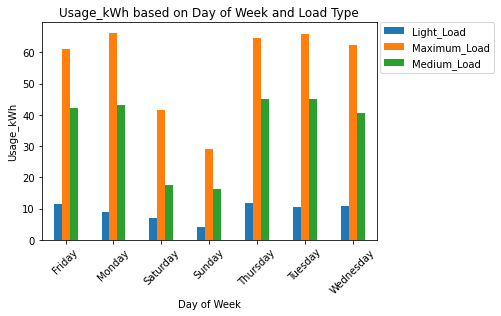

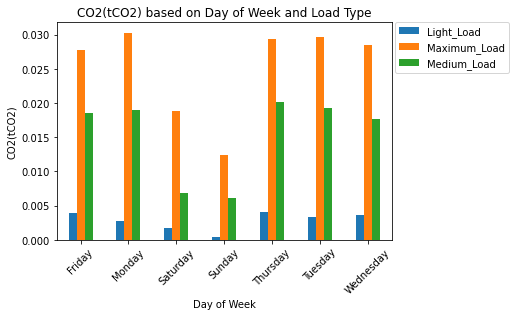

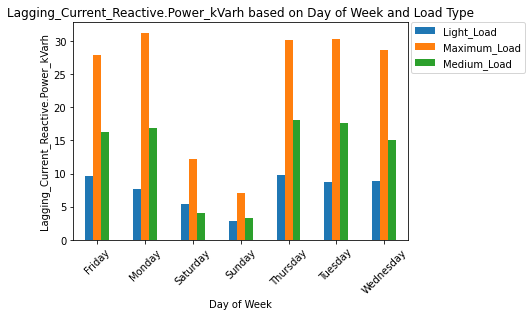

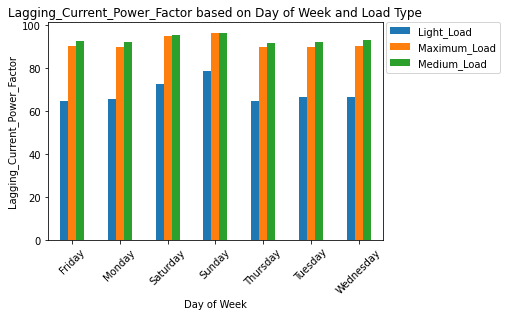

In [22]:

plt.figure(figsize=(12,4))
#x = ['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for i in range(0,2):
  for j in range(0,2):
    #plt.subplot(2,2,i*2+j+1)
    chart = df.groupby(['Day_of_week','Load_Type'])[x[i*2+j]].mean().unstack().plot(kind = 'bar')
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
    plt.title(x[i*2+j]+' based on Day of Week and Load Type')
    plt.xlabel('Day of Week')
    plt.ylabel(x[i*2+j])
    plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
    plt.show()


Visualizing data based on Week Status and Load Type:

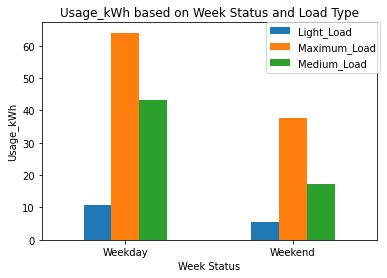

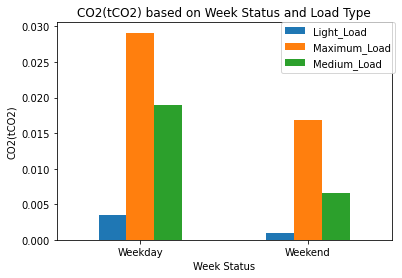

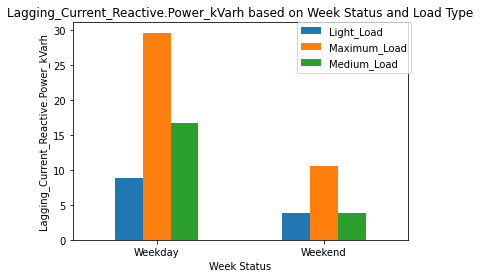

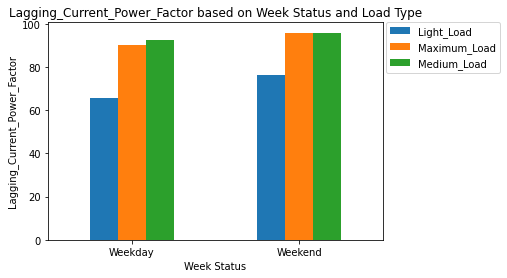

In [23]:

#x = ['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for i in range(0,2):
  for j in range(0,2):
    #plt.subplot(2,3,i*3+j+1)
    chart = df.groupby(['WeekStatus','Load_Type'])[x[i*2+j]].mean().unstack().plot(kind = 'bar')
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
    plt.title(x[i*2+j]+' based on Week Status and Load Type')
    plt.xlabel('Week Status')
    plt.ylabel(x[i*2+j])
    plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
    plt.show()
    

Resampling into Daily Time Series data:

In [24]:
df1=df.resample('D',on='date').mean()
df1

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM
date,,,,,
2018-01-01,3.665208,1.735625,0.000000,85.299375,42750.0
2018-01-02,41.150312,16.454479,0.000000,84.207292,42750.0
2018-01-03,37.094271,13.391562,0.015938,86.100000,42750.0
2018-01-04,51.851250,21.449063,0.022604,84.128125,42750.0
2018-01-05,48.785417,20.422917,0.021250,84.063021,42750.0
...,...,...,...,...,...
2018-12-27,27.227812,9.291250,0.011146,89.655625,42750.0
2018-12-28,19.151875,6.244896,0.007500,91.931562,42750.0
2018-12-29,3.931458,1.250417,0.000104,90.275417,42750.0


Daily Time Series data Descriptive Analysis for Load_Type:

In [25]:
cat_df=df[['Load_Type','date']]
cat_df_daily=cat_df.resample('D',on='date')['Load_Type'].describe()
cat_df_daily

,count,unique,top,freq
date,,,,
2018-01-01,96,1,Light_Load,96
2018-01-02,96,3,Light_Load,40
2018-01-03,96,3,Light_Load,40
2018-01-04,96,3,Light_Load,40
2018-01-05,96,3,Light_Load,40
...,...,...,...,...
2018-12-27,96,3,Light_Load,40
2018-12-28,96,3,Light_Load,40
2018-12-29,96,1,Light_Load,96


Daily Time Series Plots: 

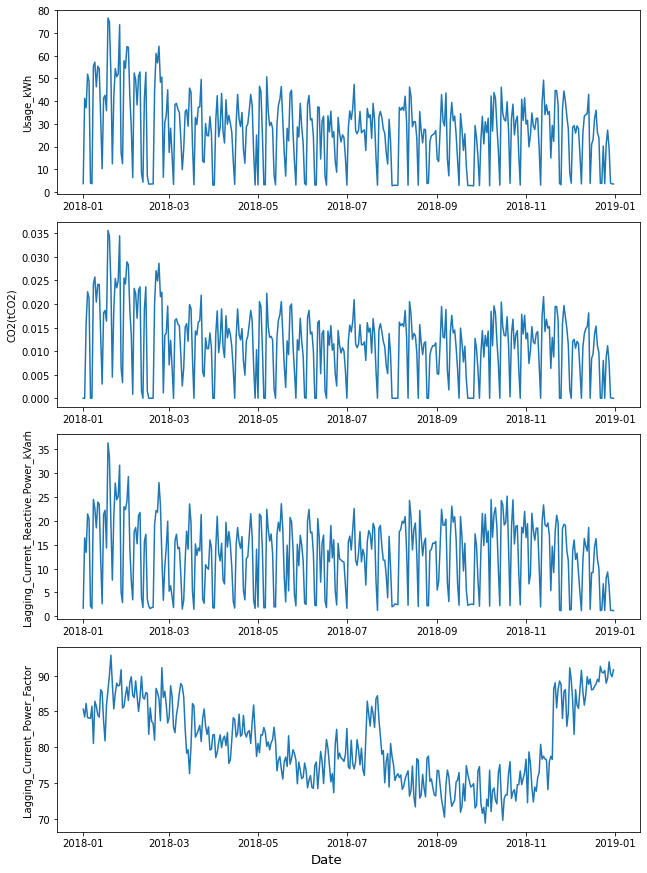

In [26]:
df1=df.resample('D',on='date').mean()
fig,axes=plt.subplots(4,figsize=(9,3*4))

axes[0].plot(df1.index,df1['Usage_kWh'])
axes[0].set_ylabel('Usage_kWh')

axes[1].plot(df1.index,df1['CO2(tCO2)'])
axes[1].set_ylabel('CO2(tCO2)')

axes[2].plot(df1.index,df1['Lagging_Current_Reactive.Power_kVarh'])
axes[2].set_ylabel('Lagging_Current_Reactive.Power_kVarh')

axes[3].plot(df1.index,df1['Lagging_Current_Power_Factor'])
axes[3].set_ylabel('Lagging_Current_Power_Factor')

fig.text(0.5, 0, 'Date', ha='center', va='center',size=13.25)

plt.tight_layout()
plt.show()


Dist Plots:

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

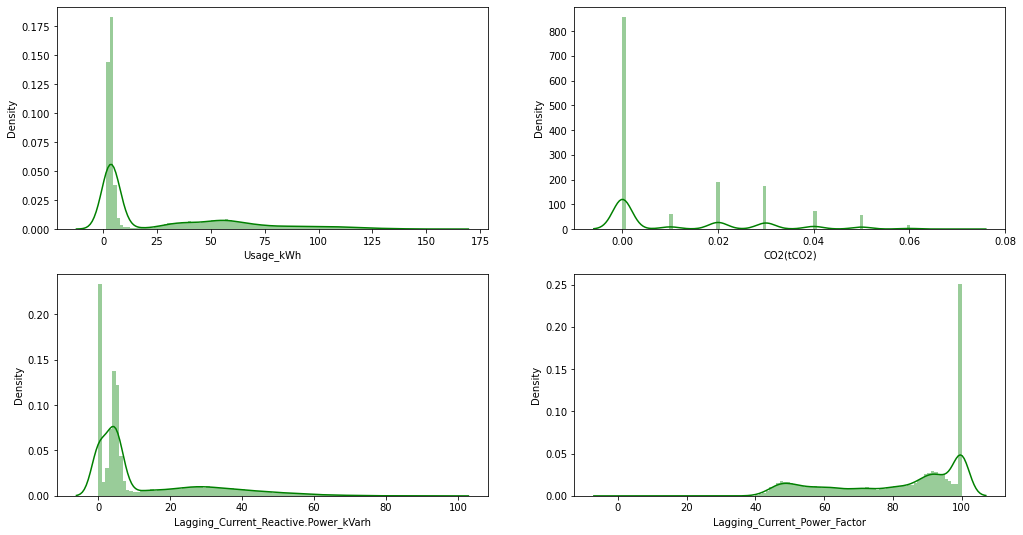

In [27]:
plt.figure(figsize=(17,9))
#x = ['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for i in range(0,2):
  for j in range(0,2):
    plt.subplot(2,2,i*2+j+1)
    sns.distplot(df[x[i*2+j]], color='g', bins=100, hist_kws={'alpha': 0.4})   
plt.show()



Resampling into Hourly Time Series data:

In [28]:
df1=df.resample('H',on='date').mean()
df1


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM
date,,,,,
2018-01-01 00:00:00,3.4575,3.5375,0.0,70.1400,1350.0
2018-01-01 01:00:00,3.5025,3.9400,0.0,66.5475,4950.0
2018-01-01 02:00:00,3.5300,4.1675,0.0,64.7400,8550.0
2018-01-01 03:00:00,3.4550,4.0500,0.0,65.0675,12150.0
2018-01-01 04:00:00,3.6175,4.4100,0.0,63.5175,15750.0
...,...,...,...,...,...
2018-12-31 19:00:00,3.9500,0.0000,0.0,100.0000,69750.0
2018-12-31 20:00:00,3.7800,0.0000,0.0,100.0000,73350.0
2018-12-31 21:00:00,3.4375,0.0000,0.0,100.0000,76950.0


Averaged Hourly Time Series data:

In [29]:
df1=df.resample('H',on='date').mean()
df1['time'] = df1.index.strftime("%H:%M:%S")
df2=pd.pivot_table(df1, index = ['time'], values = x, 
               aggfunc = np.mean)
df2

,CO2(tCO2),Lagging_Current_Power_Factor,Lagging_Current_Reactive.Power_kVarh,Usage_kWh
time,,,,
00:00:00,0.002233,63.469075,6.957664,7.870075
01:00:00,0.001322,61.852240,6.050822,6.072479
02:00:00,0.000473,60.974733,5.168486,4.428390
03:00:00,0.000479,60.235082,5.184500,4.358041
04:00:00,0.000514,59.581890,5.203432,4.309438
05:00:00,0.000507,59.280521,5.172918,4.245548
06:00:00,0.000479,59.057000,5.154329,4.223705
07:00:00,0.000486,61.477329,5.164089,4.502075
08:00:00,0.016637,72.972034,29.934432,37.704795


In [30]:
df2[df2['Usage_kWh']==min(df2['Usage_kWh'])]

,CO2(tCO2),Lagging_Current_Power_Factor,Lagging_Current_Reactive.Power_kVarh,Usage_kWh
time,,,,
06:00:00,0.000479,59.057,5.154329,4.223705


In [31]:
df2[df2['Usage_kWh']==max(df2['Usage_kWh'])]

,CO2(tCO2),Lagging_Current_Power_Factor,Lagging_Current_Reactive.Power_kVarh,Usage_kWh
time,,,,
09:00:00,0.02663,93.152829,25.13276,58.551733


Averaged Hourly Time Series data Plots:

C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/572731969.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(df2.index, rotation=90)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/572731969.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(df2.index, rotation=90)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/572731969.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(df2.index, rotation=90)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/572731969.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(df2.index, rotation=90)


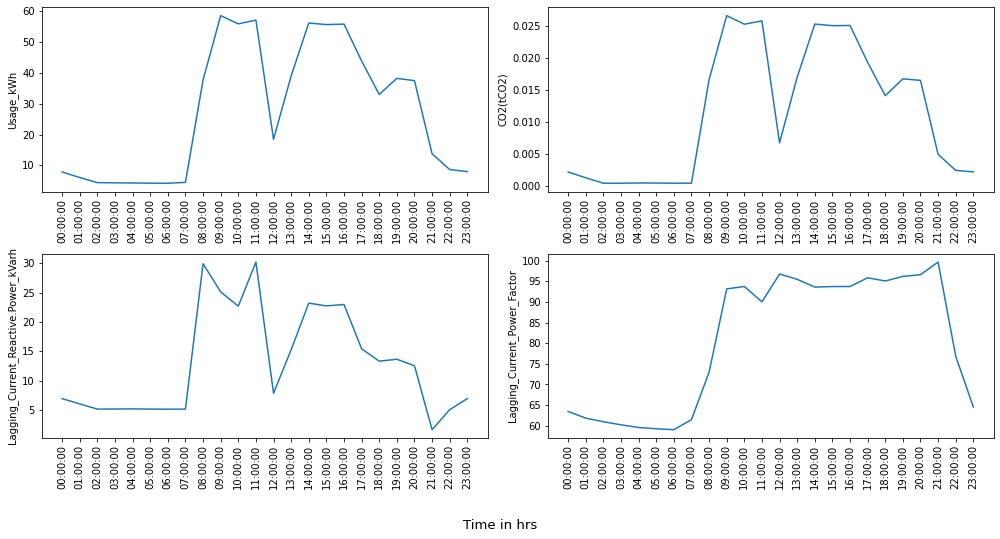

In [32]:

fig,axes=plt.subplots(2,2,figsize=(14,7))

axes[0,0].plot(df2.index,df2['Usage_kWh'])
axes[0,0].set_xticklabels(df2.index, rotation=90)
axes[0,0].set_ylabel('Usage_kWh')

axes[0,1].plot(df2.index,df2['CO2(tCO2)'])
axes[0,1].set_xticklabels(df2.index, rotation=90)
axes[0,1].set_ylabel('CO2(tCO2)')

axes[1,0].plot(df2.index,df2['Lagging_Current_Reactive.Power_kVarh'])
axes[1,0].set_xticklabels(df2.index, rotation=90)
axes[1,0].set_ylabel('Lagging_Current_Reactive.Power_kVarh')


axes[1,1].plot(df2.index,df2['Lagging_Current_Power_Factor'])
axes[1,1].set_xticklabels(df2.index, rotation=90)
axes[1,1].set_ylabel('Lagging_Current_Power_Factor')


fig.text(0.5, -0.05, 'Time in hrs', ha='center', va='center',size=13.25)

plt.tight_layout()
plt.show()

Averaged Hourly Time Series data Pareto Charts:

In [33]:
"""df2 = df2.sort_values(by='Usage_kWh', ascending=False)

df2['cumperc_Usage_kWh'] = df2['Usage_kWh'].cumsum()/df2['Usage_kWh'].sum()*100

from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(df2.index, df2['Usage_kWh'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df2.index, df2['cumperc_Usage_kWh'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax.set_xticklabels(df2.index, rotation=90)

plt.show()"""

'df2 = df2.sort_values(by=\'Usage_kWh\', ascending=False)\n\ndf2[\'cumperc_Usage_kWh\'] = df2[\'Usage_kWh\'].cumsum()/df2[\'Usage_kWh\'].sum()*100\n\nfrom matplotlib.ticker import PercentFormatter\n\n#define aesthetics for plot\ncolor1 = \'steelblue\'\ncolor2 = \'red\'\nline_size = 4\n\n#create basic bar plot\nfig, ax = plt.subplots(figsize=(10,4))\nax.bar(df2.index, df2[\'Usage_kWh\'], color=color1)\n\n#add cumulative percentage line to plot\nax2 = ax.twinx()\nax2.plot(df2.index, df2[\'cumperc_Usage_kWh\'], color=color2, marker="D", ms=line_size)\nax2.yaxis.set_major_formatter(PercentFormatter())\n\n#specify axis colors\nax.tick_params(axis=\'y\', colors=color1)\nax2.tick_params(axis=\'y\', colors=color2)\nax.set_xticklabels(df2.index, rotation=90)\n\nplt.show()'

Monthly Time Series data:

In [34]:

df1=df.resample('M',on='date').mean()
df1

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM
date,,,,,
2018-01-31,42.418780,18.300131,0.018142,86.360269,42750.0
2018-02-28,34.039189,13.353162,0.014598,86.535186,42750.0
2018-03-31,26.959143,10.758898,0.011304,83.346351,42750.0
2018-04-30,27.350625,12.061920,0.011580,81.523094,42750.0
2018-05-31,26.565618,12.913592,0.011260,79.132097,42750.0
2018-06-30,22.709944,11.421493,0.009410,77.306188,42750.0
2018-07-31,27.444358,13.331989,0.011767,80.464876,42750.0
2018-08-31,23.037443,12.837258,0.009556,75.377920,42750.0
2018-09-30,20.098288,11.526632,0.008306,74.220885,42750.0


Energy Consumption based on Monthly Status:

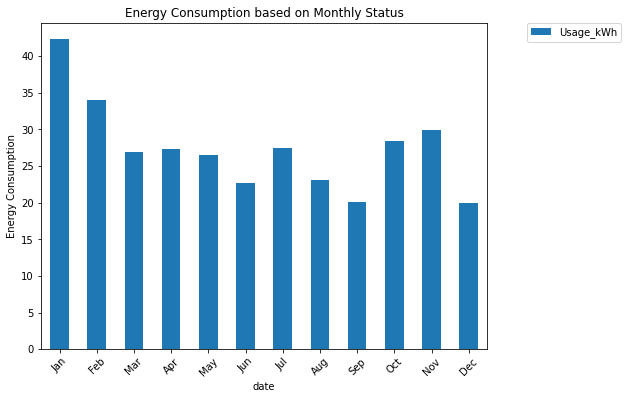

In [35]:
df1['Date']=df1.index
plt.figure(figsize=(8,6))
chart = df1.groupby(['Date'])['Usage_kWh'].mean().plot(kind = 'bar')
chart.set_xticklabels(['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation = 45)
plt.title('Energy Consumption based on Monthly Status')
plt.xlabel('date')
plt.ylabel('Energy Consumption')
plt.legend(bbox_to_anchor = (1.3, 1), borderaxespad = 0)
plt.show()

Monthly Time Series data Plots:

C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/1900163258.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/1900163258.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/1900163258.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation = 45)
C:\Users\DELL\AppData\Local\Temp/ipykernel_11116/1900163258.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep'

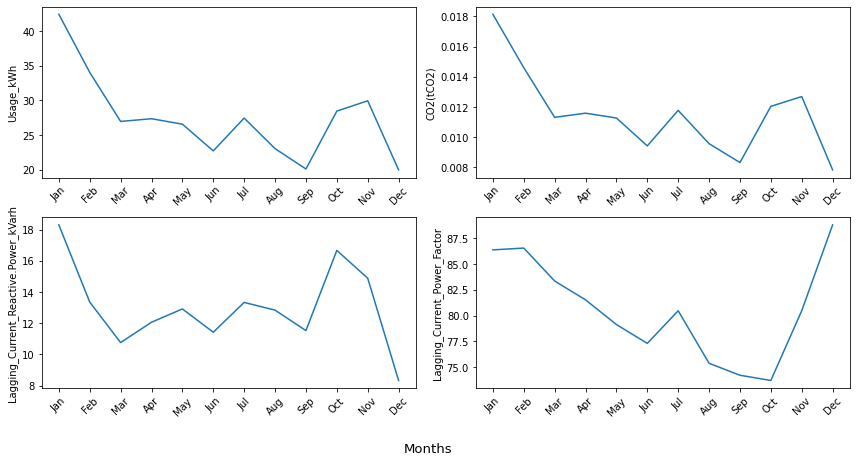

In [36]:
fig,axes=plt.subplots(2,2,figsize=(12,6))
#x = ['Usage_kWh','CO2(tCO2)','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor']
for i in range(0,2):
  for j in range(0,2):
    axes[i,j].plot(df1.index.astype(str),df1[x[i*2+j]])
    axes[i,j].set_xticklabels(['Jan','Feb','Mar',"Apr",'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation = 45)
    axes[i,j].set_ylabel(x[i*2+j])
fig.text(0.5, -0.05, 'Months', ha='center', va='center',size=13.25)
plt.tight_layout()
plt.show()


Finding Correlation:

Usage_kWh                               1.00000
Lagging_Current_Reactive.Power_kVarh    0.89615
CO2(tCO2)                               0.98818
Lagging_Current_Power_Factor            0.38596
NSM                                     0.23461
Name: Usage_kWh, dtype: float64


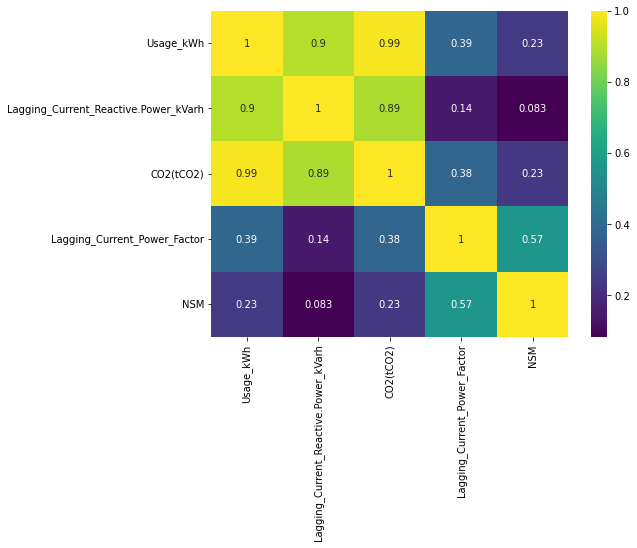

In [37]:
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(8,6))
g=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap='viridis')

cor_target = abs(corrmat['Usage_kWh'])
#Selecting features
#relevant_features = cor_target[(cor_target>0.5) & (cor_target<0.9)]
relevant_features = cor_target
print(relevant_features)



Visualizing Highly Correlated Values: 

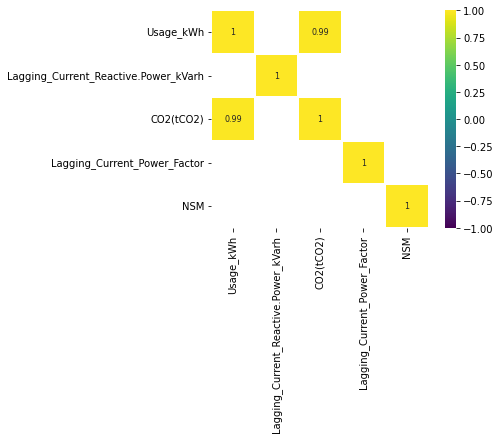

In [38]:
sns.heatmap(corrmat[(corrmat >= 0.9) | (corrmat <= -0.6)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Scaling:

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,1:-3] = sc.fit_transform(df.iloc[:,1:-3])
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,-0.724105,-0.618516,-0.71355,-0.389410,-1.678015,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,-0.699287,-0.525911,-0.71355,-0.729772,-1.641929,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,-0.722012,-0.598278,-0.71355,-0.544264,-1.605843,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,-0.719919,-0.581106,-0.71355,-0.660009,-1.569756,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,-0.704669,-0.523458,-0.71355,-0.838117,-1.533670,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,-0.703772,-0.501380,-0.71355,-0.976587,1.605843,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,-0.707061,-0.570067,-0.71355,-0.521538,1.641929,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,-0.705865,-0.605024,-0.71355,-0.209188,1.678015,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,-0.705865,-0.611770,-0.71355,-0.151052,1.714102,Weekday,Monday,Light_Load


One-hot encoding


In [40]:
df1= df.set_index('date')
df1= pd.get_dummies(df1, drop_first = True)
df1.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,
2018-01-01 00:15:00,-0.724105,-0.618516,-0.71355,-0.389410,-1.678015,0,1,0,0,0,0,0,0,0
2018-01-01 00:30:00,-0.699287,-0.525911,-0.71355,-0.729772,-1.641929,0,1,0,0,0,0,0,0,0
2018-01-01 00:45:00,-0.722012,-0.598278,-0.71355,-0.544264,-1.605843,0,1,0,0,0,0,0,0,0
2018-01-01 01:00:00,-0.719919,-0.581106,-0.71355,-0.660009,-1.569756,0,1,0,0,0,0,0,0,0
2018-01-01 01:15:00,-0.704669,-0.523458,-0.71355,-0.838117,-1.533670,0,1,0,0,0,0,0,0,0


Regression

In [41]:
X = df1.drop(['Usage_kWh','CO2(tCO2)'], axis = 1)
y = df1['Usage_kWh']

In [42]:
def linearregression(X,y):
  X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
  lr = LinearRegression()
  %time lr.fit(X_train, y_train)
  print('Accuracy:',lr.score(X_test, y_test))  
  y_pred = lr.predict(X_test) 
  return y_pred,y_test

In [43]:
def calculate_metrics(y_test,y_pred):
  print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('R square value : ', r2_score(y_test,y_pred))

In [44]:
def regressor_plot(y_test,y_pred):
  print()
  plt.plot(y_test, y_pred,'.')
  m,b=np.polyfit(y_test, y_pred, 1)
  plt.plot(y_test, m*y_test+b)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Regressor Plot')
  plt.show()

Wall time: 28 ms
Accuracy: 0.8854289236510438
Mean Absolute Error :  0.23009362202090852
Mean Squared Error :  0.11496940239815331
Root Mean Squared Error :  0.3390713824523581
R square value :  0.8854289236510438



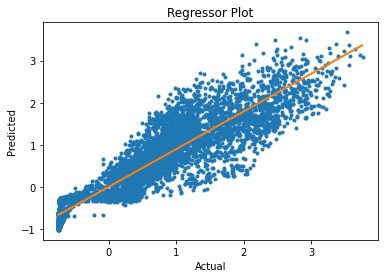

In [45]:
y_pred,y_test=linearregression(X,y)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

Poly Regression

In [46]:
def polynomial_regression(X,y):
  poly_reg = PolynomialFeatures(degree=3)
  X_poly = poly_reg.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state = 42)
  pol_reg = LinearRegression()
  %time pol_reg.fit(X_train, y_train)
  print('Accuracy: ',pol_reg.score(X_test, y_test))
  y_pred = pol_reg.predict(X_test)
  return y_pred,y_test

Wall time: 1.75 s
Accuracy:  0.976635396645779
Mean Absolute Error :  0.08481389383489192
Mean Squared Error :  0.02344583441568715
Root Mean Squared Error :  0.15312032659215155
R square value :  0.976635396645779



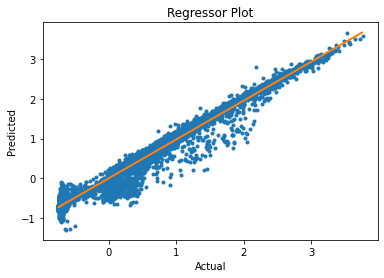

In [47]:
y_pred,y_test=polynomial_regression(X,y)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

Random Forest Regressor

In [48]:
def random_forest_regression(X,y):
  print(X.shape)
  print(y.shape)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)
  rf = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  %time rf.fit(X_train, y_train)
  print('Accuracy: ',rf.score(X_test, y_test))
  y_pred = rf.predict(X_test)
  return y_pred,y_test

(35040, 12)
(35040,)
Wall time: 882 ms
Accuracy:  0.9964654060382048
Mean Absolute Error :  0.019588056477766166
Mean Squared Error :  0.0036172148549794827
Root Mean Squared Error :  0.06014328603409929
R square value :  0.9964654060382048



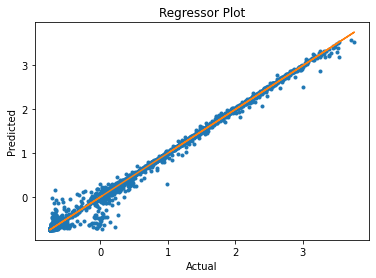

In [49]:
y_pred,y_test=random_forest_regression(X,y)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

PCA


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(X)
reduced_data_df=pd.DataFrame(reduced_data)
reduced_data_df.columns=['PC1','PC2']
reduced_data_df['date']=df['date']
reduced_data_df

,PC1,PC2,date
0,1.594444,-0.023487,2018-01-01 00:15:00
1,1.774435,0.101894,2018-01-01 00:30:00
2,1.645336,0.000412,2018-01-01 00:45:00
3,1.694617,0.024360,2018-01-01 01:00:00
4,1.775023,0.094290,2018-01-01 01:15:00
...,...,...,...
35035,-0.209525,-0.607153,2018-12-31 23:00:00
35036,-0.520389,-0.744420,2018-12-31 23:15:00
35037,-0.744461,-0.830194,2018-12-31 23:30:00
35038,-0.805482,-0.853316,2018-12-31 23:45:00


In [51]:
X = pca.fit_transform(X)
#X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.39019099, 0.24012026])

Wall time: 3 ms
Accuracy: 0.861949995003726
Mean Absolute Error :  0.26434573125894395
Mean Squared Error :  0.1385299595784786
Root Mean Squared Error :  0.3721961305259347
R square value :  0.861949995003726



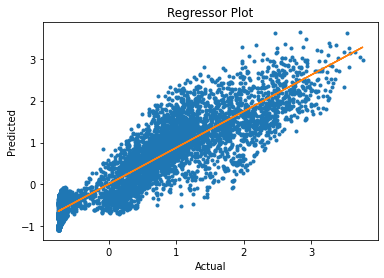

In [52]:
y_pred,y_test=linearregression(X,y)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

Polynomial Regression

Wall time: 9.04 ms
Accuracy:  0.8927357679919313
Mean Absolute Error :  0.2119810748671617
Mean Squared Error :  0.10763715455638961
Root Mean Squared Error :  0.32808101828113984
R square value :  0.8927357679919313



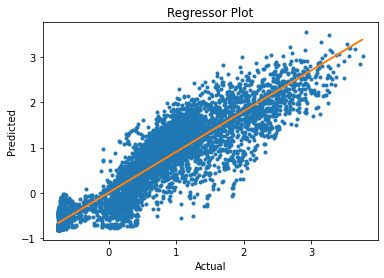

In [53]:
y_pred,y_test=polynomial_regression(X,y)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

Random Forest Regression

(35040, 2)
(35040,)
Wall time: 654 ms
Accuracy:  0.9109956088479859
Mean Absolute Error :  0.15470412312199178
Mean Squared Error :  0.09108486273482723
Root Mean Squared Error :  0.3018026884155064
R square value :  0.9109956088479859



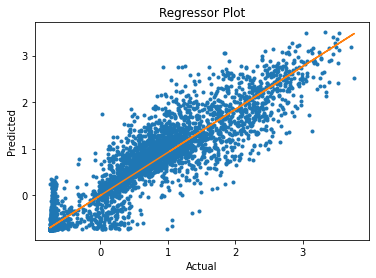

In [54]:
y_pred,y_test=random_forest_regression(X,y)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

Classification

In [55]:
df1=df.copy()
target='Load_Type'
df1[target] = df.Load_Type.astype('category')
df2=df1.set_index('date')
df2[target]=df2[target].cat.codes
df2= pd.get_dummies(df2, drop_first = True)

#print(df2)
X_target= df2.drop(['CO2(tCO2)',target], axis = 1)
y_target = df2[target]
df2

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,Load_Type,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
date,,,,,,,,,,,,,
2018-01-01 00:15:00,-0.724105,-0.618516,-0.71355,-0.389410,-1.678015,0,0,1,0,0,0,0,0
2018-01-01 00:30:00,-0.699287,-0.525911,-0.71355,-0.729772,-1.641929,0,0,1,0,0,0,0,0
2018-01-01 00:45:00,-0.722012,-0.598278,-0.71355,-0.544264,-1.605843,0,0,1,0,0,0,0,0
2018-01-01 01:00:00,-0.719919,-0.581106,-0.71355,-0.660009,-1.569756,0,0,1,0,0,0,0,0
2018-01-01 01:15:00,-0.704669,-0.523458,-0.71355,-0.838117,-1.533670,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,-0.703772,-0.501380,-0.71355,-0.976587,1.605843,0,0,1,0,0,0,0,0
2018-12-31 23:15:00,-0.707061,-0.570067,-0.71355,-0.521538,1.641929,0,0,1,0,0,0,0,0
2018-12-31 23:30:00,-0.705865,-0.605024,-0.71355,-0.209188,1.678015,0,0,1,0,0,0,0,0


In [56]:
def svm_classifier(X,y):
  svm = LinearSVC()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)
  %time svm.fit(X_train, y_train)
  print('Accuracy: ',svm.score(X_test, y_test))
  y_pred = svm.predict(X_test)
  plot_confusion_matrix(svm, X_test, y_test)  
  plt.title('Confusion Matrix')
  plt.show()

  print()
  print(classification_report(y_test, y_pred))

Wall time: 2.87 s
Accuracy:  0.7310216894977168


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


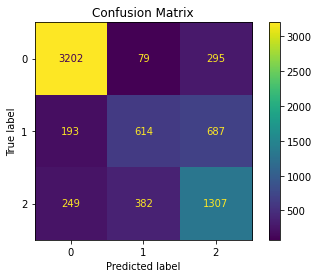


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3576
           1       0.57      0.41      0.48      1494
           2       0.57      0.67      0.62      1938

    accuracy                           0.73      7008
   macro avg       0.67      0.66      0.66      7008
weighted avg       0.73      0.73      0.73      7008



In [57]:
svm_classifier(X_target,y_target)

In [58]:
classification_reportdf1=df.copy()
df1['Load_Type'] = df.Load_Type.astype('category')

In [59]:
lda = LinearDiscriminantAnalysis()
df2=df1.set_index('date')

#print(df['Load_Type'].dtype)
df2['Load_Type']=df2['Load_Type'].cat.codes
df2= pd.get_dummies(df2, drop_first = True)

#print(df2)
X_lda = df2.drop(['CO2(tCO2)','Load_Type'], axis = 1)
y_lda = df2['Load_Type']
df2
X_lda = lda.fit_transform(X_lda, y_lda)
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_lda, test_size = 0.3, random_state = 42)
lda.fit(X_train, y_train)
#lda.fit(X_train, y_train)
X_train

array([[-1.4126017 ,  0.38326389],
       [-2.47302144, -0.56690779],
       [ 0.50061164,  1.56626345],
       ...,
       [ 0.42185664,  0.50615786],
       [ 0.60704265,  1.68128901],
       [ 0.39259333,  1.28806853]])

Wall time: 1.45 s
Accuracy:  0.7178938356164384


C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


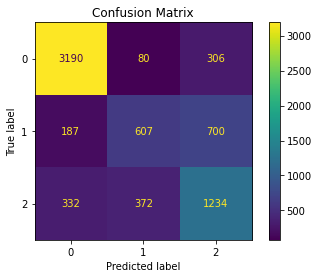


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3576
           1       0.57      0.41      0.48      1494
           2       0.55      0.64      0.59      1938

    accuracy                           0.72      7008
   macro avg       0.66      0.65      0.65      7008
weighted avg       0.71      0.72      0.71      7008



In [60]:
svm_classifier(X_lda,y_lda)

Wall time: 3 ms
Accuracy: 0.5366653672931689
Mean Absolute Error :  0.462763951782874
Mean Squared Error :  0.3396926460051171
Root Mean Squared Error :  0.5828315760192795
R square value :  0.5366653672931689



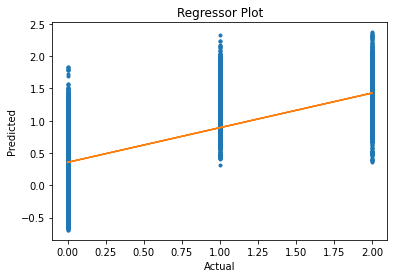

In [61]:
y_pred,y_test=linearregression(X_lda,y_lda)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

Wall time: 7.04 ms
Accuracy:  0.5821386914111057
Mean Absolute Error :  0.40638280828222406
Mean Squared Error :  0.30635399030820076
Root Mean Squared Error :  0.5534925386201703
R square value :  0.5821386914111057



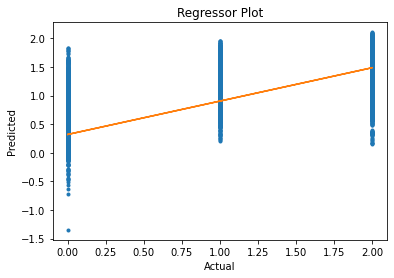

In [62]:
y_pred,y_test=polynomial_regression(X_lda,y_lda)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

(35040, 2)
(35040,)
Wall time: 588 ms
Accuracy:  0.5878479823424613
Mean Absolute Error :  0.3178368655776618
Mean Squared Error :  0.30177111736302986
Root Mean Squared Error :  0.5493369797883899
R square value :  0.5878479823424613



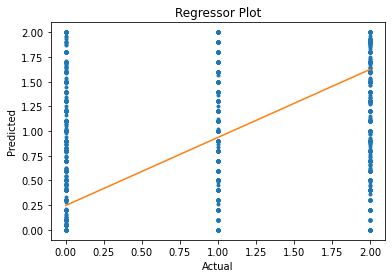

In [63]:
y_pred,y_test=random_forest_regression(X_lda,y_lda)
calculate_metrics(y_test,y_pred)
regressor_plot(y_test,y_pred)

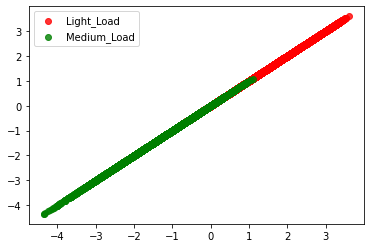

In [64]:
target_names = df['Load_Type'].unique()
data_plot = lda.fit(X_lda, y_lda).transform(X_lda)
plt.figure()
colors = ['red', 'green']
lw = 2
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(data_plot[y_lda== i, 0], data_plot[y_lda == i, 0], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()